やること
- MTQノイズの異常検知
    - 15-600 Hzまでの周波数帯でやってみる
    - ピクセルは0に限定する
    - 教師あり学習を行う
    
- うまくいかなければ
    - 周波数帯を上げる
    - 異常データの中身の見直し

## 初期条件

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import glob
import pickle
import random
import functools

from visualize import visualization
myvs = visualization()
from select_datasets import Select_datasets as my_SD
myds = my_SD("/data7/ALL/db/ns/8k")
from sklearn.preprocessing import StandardScaler


#sample_data

path="/data6/ALL/db/ns/8k"
npz_files = glob.glob(path+"/**.npz")

plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.get_cmap("Set1").colors)

d = np.load(npz_files[3])

D_df = pd.DataFrame(d["arr_0"]).T

# Constant

f_s = 12.5*10**3
th_s = 2
N = 4096
pixel_number=36

f_range = f_s/th_s
f_resolution = f_range/N

min_freq = 10
max_freq = 400

start = math.ceil(min_freq/f_resolution)-1
stop = math.ceil(max_freq/f_resolution)-1

x = np.arange(start+1,stop+1)*f_resolution
D_df_limfreq = D_df.iloc[:,start:stop]

## データ取得

In [3]:
def load_npzfile_CertainPixcel(file,pixcel_list):
        return np.load(file)["arr_0"].T[pixcel_list]
    
def concat_npz(target_list=False):
        """
        npzファイルのすべてを結合する

        return: DataFrame
        """
         
        if target_list == False:
            npz_files = glob.glob(self.path+"/**.npz")
            target_list = npz_files
            
        data_np = np.concatenate(list(map(functools.partial(load_npzfile_CertainPixcel,pixcel_list=[0,9,18,27]),target_list)))
        return pd.DataFrame(data_np)
    
def concat_npz_nontarget(Pixcel_list,target_list=False):
        """
        npzファイルのすべてを結合する

        return: DataFrame
        """
         
        if target_list == False:
            npz_files = glob.glob(self.path+"/**.npz")
            target_list = npz_files
            
        data_np = np.concatenate(list(map(functools.partial(load_npzfile_CertainPixcel,pixcel_list=Pixcel_list),target_list)))
        return pd.DataFrame(data_np)

In [4]:
# MTQ data6

MTQ_list_data6 = [
    "/data6/2108_ResolveIT_TC3/db.old/ns/8k/ns8k_20210914-050153.npz",
    "/data6/2108_ResolveIT_TC3/db.old/ns/8k/ns8k_20210914-052114.npz",
    "/data6/2108_ResolveIT_TC3/db.old/ns/8k/ns8k_20210914-050812.npz",
    "/data6/2108_ResolveIT_TC3/db.old/ns/8k/ns8k_20210914-051344.npz",
    "/data6/2108_ResolveIT_TC3/db.old/ns/8k/ns8k_20210914-055706.npz",
    "/data6/2108_ResolveIT_TC3/db.old/ns/8k/ns8k_20210915-044032.npz",
    "/data6/2108_ResolveIT_TC3/db.old/ns/8k/ns8k_20210915-062350.npz",
    "/data6/2108_ResolveIT_TC3/db.old/ns/8k/ns8k_20210915-054151.npz",
    "/data6/2108_ResolveIT_TC3/db.old/ns/8k/ns8k_20210915-051018.npz",
    "/data6/2108_ResolveIT_TC3/db.old/ns/8k/ns8k_20210915-051957.npz",
    "/data6/2108_ResolveIT_TC3/db.old/ns/8k/ns8k_20210915-045239.npz",
    "/data6/2108_ResolveIT_TC3/db.old/ns/8k/ns8k_20210915-045819.npz",]

df_data6_MTQ_noise = concat_npz(target_list=MTQ_list_data6)
df_data6_MTQNoise_pre = df_data6_MTQ_noise.iloc[:,start:stop]
df_data6_MTQNoise_pre = myds.delete_0_gyou(df_data6_MTQNoise_pre)
df_data6_MTQNoise_pre_ = df_data6_MTQNoise_pre

/usr/local/conda/lib/python3.7/site-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [5]:
# MTQ data7

MTQ_list_data7 = [
    "/data7/ALL/db/ns/8k/ns8k_20220609-062512.npz",
    "/data7/ALL/db/ns/8k/ns8k_20220611-020610.npz",
    "/data7/ALL/db/ns/8k/ns8k_20220611-021235.npz",
    "/data7/ALL/db/ns/8k/ns8k_20220609-063438.npz",
    "/data7/ALL/db/ns/8k/ns8k_20220609-065340.npz",]

df_data7_MTQ_noise = concat_npz(target_list=MTQ_list_data7)
df_data7_MTQNoise_pre = df_data7_MTQ_noise.iloc[:,start:stop]
df_data7_MTQNoise_pre = myds.delete_0_gyou(df_data7_MTQNoise_pre)

df_data7_MTQNoise_pre_ = df_data7_MTQNoise_pre

In [6]:
pd.concat([df_data6_MTQNoise_pre_,df_data7_MTQNoise_pre_])
df_data6_MTQNoise_pre

6           7            8            9           10          11   \
0   305.008833  328.150736   384.588940   391.883801  405.818049  395.367284   
1   278.508708  331.547382   344.906234   428.264338  342.508018  415.457776   
2   327.783955  369.325060   420.013056   434.938016  496.690894  494.825314   
3   311.033157  371.686829   447.237514   480.427414  370.663941  474.293510   
4   264.661236  313.927802   345.626700   435.835190  371.412031  444.579561   
5   279.399740  322.396855   355.288143   426.623715  342.400177  355.024795   
6   277.833477  356.358559   430.056120   457.501743  400.585548  500.868918   
7   269.112037  325.423512   348.801404   471.682002  409.314574  390.259442   
8   263.493390  292.318124   352.680511   388.614921  393.344665  388.591696   
9   244.618068  300.643107   379.434763   416.999334  375.737166  438.329827   
10  309.372702  340.941646   405.553120   397.420648  474.672886  501.010960   
11  278.348350  367.158162   439.992987   373.560457  446.971594  462.622876   
12  285.459372  298.801297   375.485403   378.505946  366.186101  369.048933   
13  256.120166  311.239465   397.429773   395.771502  387.114762  414.951042   
14  349.134282  348.489587   362.339803   404.278076  461.249483  458.065726   
15  296.967807  313.987008   419.490331   364.062465  404.211510  443.148672   
16  257.055726  335.133280   301.653089   384.543729  359.001928  365.698492   
17  249.020657  313.239749   373.703592   391.687635  375.576956  370.913548   
18  301.664158  355.478276   429.994535   418.531193  458.175889  444.259271   
19  290.795845  355.372095   374.890517   440.995570  413.523597  387.305527   
20  306.587158  336.206699   400.503015   457.648081  420.095383  450.126117   
21  283.766225  301.045406   389.355017   363.187031  378.396223  340.085637   
22  286.989005  345.116303   430.350515   437.205783  467.638301  454.262015   
23  290.705594  305.351401   433.379265   446.739284  380.798402  413.703805   
24  262.499204  302.355179   357.078707   374.592710  388.291354  378.760008   
25  295.799025  310.079659   406.773787   336.584928  408.221816  410.752893   
26  267.183529  317.964224   341.975105   386.031533  453.018131  443.489979   
27  321.690316  338.165037   397.618265   403.316301  383.748350  401.544818   
28  285.126809  297.468895   279.510913   409.119446  362.322759  423.865069   
29  283.473890  266.849645   405.792761   405.154605  365.052528  349.022836   
30  292.505787  374.869694   398.476040   382.181438  397.821723  413.752663   
31  300.865701  353.586868   356.754249   338.702721  381.862045  419.777070   
32  414.999128  547.086794  1500.040242  1311.447657  595.187981  470.658736   
33  365.618378  514.980829  1416.900028  1310.338619  584.882986  506.894825   
34  360.429912  535.126515  1331.089755  1204.385423  575.145026  495.780664   
35  469.051349  622.529864  1543.603274  1399.326128  627.911932  506.019524   
36  144.553519  181.328937   173.992583   199.535113  205.268396  250.154303   
37  167.018205  190.419378   177.577249   194.745264  202.508432  212.420249   
38  158.104254  209.157393   191.529728   222.093855  224.139416  238.565557   
39  159.683797  179.030436   178.290951   225.486654  216.274017  243.538182   
40  304.747166  330.937594   363.261307   313.039867  351.583280  379.524351   
41  314.512416  308.302710   365.652465   374.996819  394.260706  388.316238   
42  311.203356  361.355367   405.689537   454.052892  408.555655  444.483651   
43  314.865787  301.499498   336.427232   384.765091  396.084732  354.571993   
44  261.286000  331.265312   370.420260   342.747308  391.380006  416.084686   
45  303.758801  276.601397   349.113127   391.461914  364.031922  355.104835   
46  307.304194  336.372916   407.826133   453.808946  451.868468  438.140549   
47  288.868812  278.599022   362.102859   415.268578  429.675634  367.758797   

           12          13          14          15   ...         252  \
0   426.688728  525

In [7]:
a = pd.concat([df_data6_MTQNoise_pre_,df_data7_MTQNoise_pre_])
a = a.sample(frac=1, random_state=0)
#a = np.log(a)#log
a.index = range(len(a))

df_data6_MTQNoise_pre,df_data7_MTQNoise_pre = myds.train_test_dataframe(a,test_frac=0.5)

In [8]:
# not normal データ

npz_files = glob.glob("/data7/ALL/db/ns/8k/**.npz")
for d in MTQ_list_data7:
    if d in npz_files:
        npz_files.remove(d)
    
df_data7 = concat_npz(npz_files)
df_data7_pre = df_data7.iloc[:,start:stop]
df_data7_pre = myds.delete_0_gyou(df_data7_pre)

/usr/local/conda/lib/python3.7/site-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [9]:
#df_data7_pre = np.log(df_data7_pre)

In [10]:
df_data7_pre

6           7           8           9           10          11   \
0      283.218400  227.487783  310.910962  299.052485  356.826927  489.124965   
1      185.675458  229.172622  290.773591  474.497332  427.970026  244.904723   
2      263.686886  324.070092  288.548482  569.080403  353.554900  355.530138   
3      315.347786  315.838194  315.629552  326.740181  363.705546  425.714358   
4      224.310898  302.005031  312.203911  407.468718  355.955118  343.820011   
...           ...         ...         ...         ...         ...         ...   
11588  263.112174  317.003774  382.425507  361.920374  395.125508  379.347490   
11589  296.603723  323.268186  332.577591  383.077018  366.751210  373.287057   
11590  310.976101  333.382041  319.552449  392.358299  410.164140  369.696655   
11591  271.730689  315.801216  371.165895  438.559672  433.205554  480.685082   
11592  192.771222  250.317502  324.740305  325.122718  479.322880  408.505367   

              12          13          14          15   ...         252  \
0      444.590309  416.087676  413.838826  455.780657  ...  392.702665   
1      337.616090  514.767921  328.818643  467.561993  ...  671.819651   
2      371.791914  395.966641  438.305731  426.362477  ...  583.316165   
3      430.385671  469.282265  506.589067  447.261444  ...  513.519348   
4      414.844747  393.204166  431.430857  510.035396  ...  517.250505   
...           ...         ...         ...         ...  ...         ...   
11588  422.151069  450.908046  488.315094  469.161944  ...  517.476762   
11589  423.408110  409.870850  457.808918  438.592504  ...  589.518412   
11590  424.892786  425.460247  510.276967  514.335894  ...  539.923004   
11591  480.174455  534.095824  547.890619  561.654630  ...  572.606698   
11592  464.838226  448.425180  478.414311  563.816000  ...  706.228949   

              253         254         255         256         257         258  \
0      671.941819  482.493852  869.669945  241.474930  768.090843  552.634092   
1      704.410522  573.642338  591.451012  516.244560  501.295907  530.893660   
2      455.488191  643.943566  593.171247  439.071100  580.633710  650.470580   
3      617.998870  606.989139  534.467106  534.225244  500.671743  603.593705   
4      534.153097  683.492801  451.986063  642.458800  613.207290  521.967234   
...           ...         ...         ...         ...         ...         ...   
11588  596.398472  599.060799  512.154416  581.659656  562.314153  573.048138   
11589  559.723720  571.451550  547.182205  603.164064  571.866351  577.732575   
11590  580.063317  528.928408  615.968135  564.996911  593.754239  496.513463   
11591  654.934520  620.552147  643.341525  543.171373  616.041605  620.445628   
11592  542.348898  622.288006  359.689503  544.542230  675.332390  351.856913   

              259         260         261  
0      645.699753  410.514791  563.427913  
1      603.777098  547.300300  624.998518  
2      479.109346  588.898812  514.470639  
3      580.809097  532.332646  660.393341  
4      502.558792  551.928601  532.682958  
...           ...         ...         ...  
11588  472.089763  618.238094  566.227234  
11589  572.111980  616.776518  601.390853  
11590  576.932654  595.282641  583.927626  
11591  647.277722  546.490747  608.747640  
11592  810.760372  689.727235  647.604323  

[11593 rows x 256 columns]

## SGD Classifier for MTQ

In [11]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.kernel_approximation import RBFSampler

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,cross_val_predict

from save_model import save_models as mysm

In [12]:
import itertools
from imblearn.over_sampling import SMOTE
def my_Grid(parameters,train,test):
    
    smote = SMOTE(random_state=0)
    test[0], test[1] = smote.fit_resample(test[0], test[1])
    print("a")
    print(len(np.array(test[1])[np.array(test[1])==-1]))
    
    score_result=[]
    
    product = [x for x in itertools.product(*parameters.values())]
    result = [dict(zip(parameters.keys(), r)) for r in product]
    
    for settings in result:
        model = SGDClassifier(random_state=0)
        model.fit(train[0],train[1])
        score_result.append(np.mean(cross_val_score(model, test[0],test[1],cv=3)))
    print(score_result)
    return result[np.argmax(score_result)]
            

In [13]:
def SGD_class_per(per,is_per = False,save=False):
    
    #train test split
    df_train,df_test = myds.train_test_dataframe(df_data=df_data7_pre,test_frac=0.01)
    
    # 教師。グリッド、ｎ分割
    
    #教師 normal　加工①　ピーク1500以下 
    df_train = df_train[(df_train.iloc[:,[82,165,249]]<1500).all(axis=1)]
    #教師作成
    y_train_true = np.concatenate([
    np.ones(len(df_train)),
    np.ones(len(df_data6_MTQNoise_pre))*-1])
    #SMOTE
    smote = SMOTE(random_state=0)
    x_train, y_train = smote.fit_resample(df_train.values.tolist()+df_data6_MTQNoise_pre.values.tolist(), y_train_true)
    
    x_train,x_grid,y_train,y_grid = train_test_split(x_train,y_train,test_size=0.6)
    x_grid,x_per,y_grid,y_per = train_test_split(x_grid,y_grid,test_size=0.5)
    
    
    ######################################
    
    #テスト noraml 加工
    df_test_ = df_test[(df_test.loc[:,[82,165,249]]<950).all(axis=1)]
    
    ###################################3

    #教師 normal 加工②　avarage 化
    df_train = pd.DataFrame(np.array(x_train)[np.array(y_train)==1])
    lim = len(df_train)//per*per

    df_train = df_train.sample(frac=1)
    df_train = df_train.to_numpy()[:lim].reshape([int(lim/per),per,len(df_train.to_numpy()[0])])
    df_train = pd.DataFrame(myvs.avarange(df_train))
    df_train.columns = df_data7_pre.columns
    df_train_ = df_train
    
    ####################################
    
    #train
    x_train_ = df_train.values.tolist()+list(np.array(x_train)[np.array(y_train)==-1])
    
    y_train = np.concatenate([
    np.ones(len(df_train)),
    np.ones(len(np.array(x_train)[np.array(y_train)==-1]))*-1])

    #テスト正解作成
    df_test = pd.concat([df_test_,df_data7_MTQNoise_pre])
    x_test = df_test.values.tolist()
    
    y_test = np.concatenate([
    np.ones(len(df_test_)),
    np.ones(len(df_data7_MTQNoise_pre))*-1])
   
    ###############################################
    
    #正規化

    sc = StandardScaler()
    sc.fit(x_train_)
    x_train_std = sc.transform(x_train_)

    sc = StandardScaler()
    sc.fit(x_grid)
    x_grid_std = sc.transform(x_grid)

    sc = StandardScaler()
    sc.fit(x_per)
    x_per_std = sc.transform(x_per)

    sc = StandardScaler()
    sc.fit(x_test)
    x_test_std = sc.transform(x_test)
    
    #######################################3
    
    #Grid Search
    
    parameters = {
    "penalty":["l1","l2"],
    "alpha":[10**-7,10**-6,10**-5],
    "loss":["squared_hinge","hinge"]
    }
    print(len(x_grid_std),len(y_grid))
    
    best_params_=my_Grid(parameters,[x_train_std,y_train],[x_grid_std,y_grid])
    print(best_params_)
    ##################################

    #学習
    
    if is_per:
        target = x_per
        target_std = x_per_std
        target_y = y_per
    else:
        target = x_test
        target_std = x_test_std
        target_y = y_test
        
    #sgd = SGDClassifier(random_state=0)
    sgd = SGDClassifier(random_state=0,**best_params_)
    sgd.fit(x_train_std,y_train)
    df_sgd_predict = sgd.predict(target_std)
    #結果
    m = confusion_matrix(target_y,df_sgd_predict)
    
    
    return [m,df_sgd_predict,np.array(target),np.array(target_y)]

6865 6865
a
3460
[0.9932083219453646, 0.9932083219453646, 0.9932083219453646, 0.9932083219453646, 0.9932083219453646, 0.9932083219453646, 0.9932083219453646, 0.9932083219453646, 0.9932083219453646, 0.9932083219453646, 0.9932083219453646, 0.9932083219453646]
{'penalty': 'l1', 'alpha': 1e-07, 'loss': 'squared_hinge'}
6865 6865
a
3471
[0.9935177182368194, 0.9935177182368194, 0.9935177182368194, 0.9935177182368194, 0.9935177182368194, 0.9935177182368194, 0.9935177182368194, 0.9935177182368194, 0.9935177182368194, 0.9935177182368194, 0.9935177182368194, 0.9935177182368194]
{'penalty': 'l1', 'alpha': 1e-07, 'loss': 'squared_hinge'}
6865 6865
a
3464
[0.9935044936777288, 0.9935044936777288, 0.9935044936777288, 0.9935044936777288, 0.9935044936777288, 0.9935044936777288, 0.9935044936777288, 0.9935044936777288, 0.9935044936777288, 0.9935044936777288, 0.9935044936777288, 0.9935044936777288]
{'penalty': 'l1', 'alpha': 1e-07, 'loss': 'squared_hinge'}
6865 6865
a
3469
[0.9930817040836833, 0.993081704

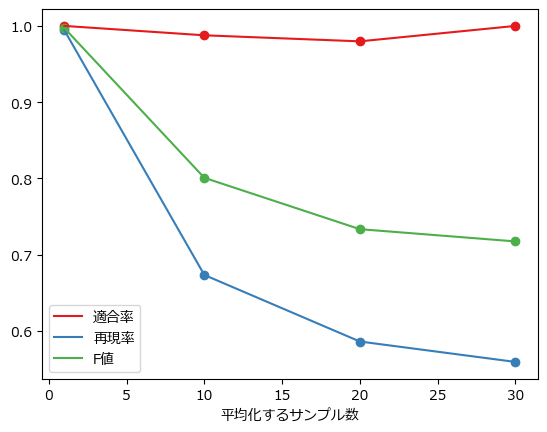

In [14]:
List_SGD_result = []
F_rate = []
target_per = [1]+list(range(10,40,10))

for per in target_per:
    
    m = SGD_class_per(per,is_per=True)[0]

    tekigo = m[0][0]/(m[0][0]+m[0][1])
    saigen = m[0][0]/(m[0][0]+m[1][0])
    
    FR = 2*tekigo*saigen/(tekigo+saigen)

    List_SGD_result.append([tekigo,saigen])
    F_rate.append(FR)
    
#ROC曲線

plt.rcParams['font.family'] = 'Meiryo'

List_SGD_result = np.array(List_SGD_result)
fig,ax = plt.subplots()

ax.scatter(target_per,List_SGD_result.T[0])
ax.plot(target_per,List_SGD_result.T[0],label="適合率")
ax.scatter(target_per,List_SGD_result.T[1])
ax.plot(target_per,List_SGD_result.T[1],label="再現率")
ax.scatter(target_per,F_rate)
ax.plot(target_per,F_rate,label="F値")

ax.set_xlabel("平均化するサンプル数")
ax.legend()

In [15]:
per =1

m,predict,target,target_y = SGD_class_per(per=per,save=True)
print(m)  
    

6865 6865
a
3451
[0.9940597975675353, 0.9940597975675353, 0.9940597975675353, 0.9940597975675353, 0.9940597975675353, 0.9940597975675353, 0.9940597975675353, 0.9940597975675353, 0.9940597975675353, 0.9940597975675353, 0.9940597975675353, 0.9940597975675353]
{'penalty': 'l1', 'alpha': 1e-07, 'loss': 'squared_hinge'}
[[33  1]
 [13 94]]


In [16]:
FPR = m[1][0]/sum(m[1])
TPR = m[0][0]/sum(m[0])

print(FPR,TPR)

0.12149532710280374 0.9705882352941176


In [42]:
len(target[(target_y==-1) & (predict==1)])

1

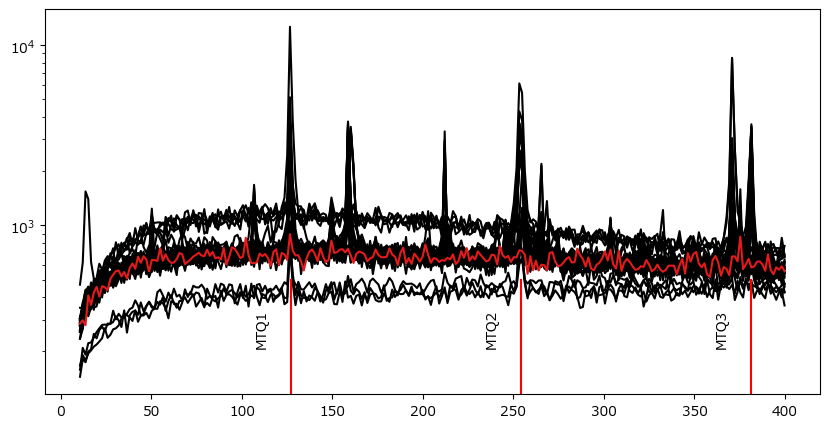

In [47]:
fig,ax = plt.subplots(1,1,figsize=(10,5))

for d in target[(target_y==-1) & (predict==-1)]:
    ax.plot(x,d,color="black")

for d in target[(target_y==-1) & (predict==1)]:
    ax.plot(x,d)

ax.text(127-20,215,"MTQ1",rotation=90)
ax.text(254-20,215,"MTQ2",rotation=90)
ax.text(381-20,215,"MTQ3",rotation=90)

ax.plot([127,127],[0,500],color="red") #MTQ 82
ax.plot([254,254],[0,500],color="red") # MTQ3 166 
ax.plot([381,381],[0,500],color="red") # MTQ4 249

ax.set_yscale("log")

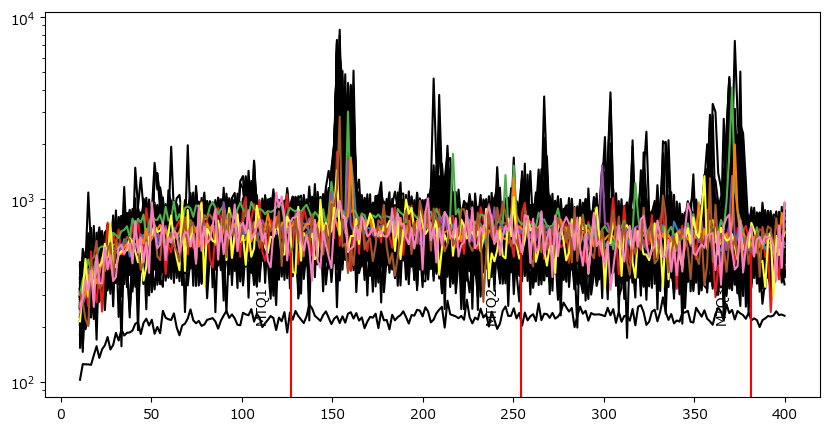

In [46]:
fig,ax = plt.subplots(1,1,figsize=(10,5))

for d in target[(target_y==1) & (predict==1)]:
    ax.plot(x,d,color="black")

for d in target[(target_y==1) & (predict==-1)]:
    ax.plot(x,d)
    
ax.text(127-20,215,"MTQ1",rotation=90)
ax.text(254-20,215,"MTQ2",rotation=90)
ax.text(381-20,215,"MTQ3",rotation=90)

ax.plot([127,127],[0,500],color="red") #MTQ 82
ax.plot([254,254],[0,500],color="red") # MTQ3 166 
ax.plot([381,381],[0,500],color="red") # MTQ4 249

ax.set_yscale("log")

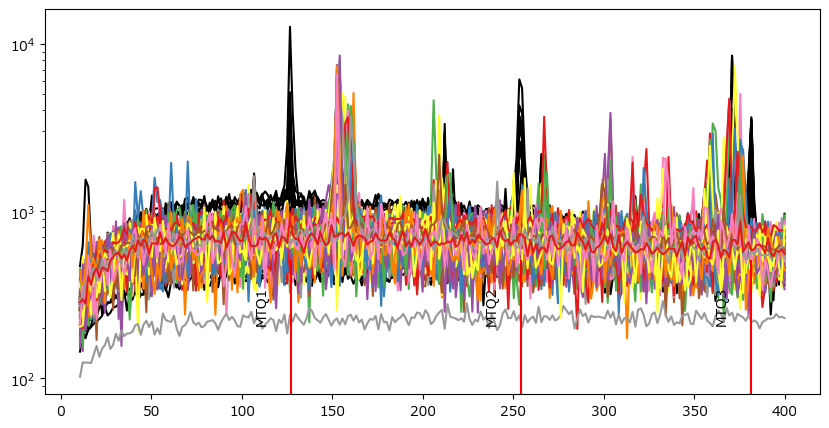

In [48]:
fig,ax = plt.subplots(1,1,figsize=(10,5))

for d in target[ (predict==-1)]:
    ax.plot(x,d,color="black")

for d in target[ (predict==1)]:
    ax.plot(x,d)
    


    
ax.text(127-20,215,"MTQ1",rotation=90)
ax.text(254-20,215,"MTQ2",rotation=90)
ax.text(381-20,215,"MTQ3",rotation=90)

ax.plot([127,127],[0,500],color="red") #MTQ 82
ax.plot([254,254],[0,500],color="red") # MTQ3 166 
ax.plot([381,381],[0,500],color="red") # MTQ4 249

ax.set_yscale("log")

## Linear SVC

In [17]:
from sklearn.svm import LinearSVC

In [18]:
import itertools
def my_LVGrid(parameters,train,test):
    
    smote = SMOTE(random_state=0)
    train[0], train[1] = smote.fit_resample(train[0], train[1])
    smote = SMOTE(random_state=0)
    test[0], test[1] = smote.fit_resample(test[0], test[1])
    
    score_result=[]
    
    product = [x for x in itertools.product(*parameters.values())]
    result = [dict(zip(parameters.keys(), r)) for r in product]
    
    for settings in result:
        model = LinearSVC(random_state=0)
        model.fit(train[0],train[1])
        score_result.append(np.mean(cross_val_score(model, test[0],test[1],cv=3)))
    print(score_result)
    return result[np.argmax(score_result)]

In [19]:
def LS_class_per(per,is_per = False,save=False):
    
    #train test split
    df_train,df_test = myds.train_test_dataframe(df_data=df_data7_pre,test_frac=0.01)
    
    # 教師。グリッド、ｎ分割
    
    #教師 normal　加工①　ピーク1500以下 
    df_train = df_train[(df_train.iloc[:,[82,165,249]]<1500).all(axis=1)]
    #教師作成
    y_train_true = np.concatenate([
    np.ones(len(df_train)),
    np.ones(len(df_data6_MTQNoise_pre))*-1])
    #SMOTE
    smote = SMOTE(random_state=0)
    x_train, y_train = smote.fit_resample(df_train.values.tolist()+df_data6_MTQNoise_pre.values.tolist(), y_train_true)
    
    x_train,x_grid,y_train,y_grid = train_test_split(x_train,y_train,test_size=0.6)
    x_grid,x_per,y_grid,y_per = train_test_split(x_grid,y_grid,test_size=0.5)
    
    
    ######################################
    
    #テスト noraml 加工
    df_test_ = df_test[(df_test.loc[:,[82,165,249]]<950).all(axis=1)]
    
    ###################################3

    #教師 normal 加工②　avarage 化
    df_train = pd.DataFrame(np.array(x_train)[np.array(y_train)==1])
    lim = len(df_train)//per*per

    df_train = df_train.sample(frac=1)
    df_train = df_train.to_numpy()[:lim].reshape([int(lim/per),per,len(df_train.to_numpy()[0])])
    df_train = pd.DataFrame(myvs.avarange(df_train))
    df_train.columns = df_data7_pre.columns
    df_train_ = df_train
    
    ####################################
    
    #train
    x_train_ = df_train.values.tolist()+list(np.array(x_train)[np.array(y_train)==-1])
    
    y_train = np.concatenate([
    np.ones(len(df_train)),
    np.ones(len(np.array(x_train)[np.array(y_train)==-1]))*-1])

    #テスト正解作成
    df_test = pd.concat([df_test_,df_data7_MTQNoise_pre])
    x_test = df_test.values.tolist()
    
    y_test = np.concatenate([
    np.ones(len(df_test_)),
    np.ones(len(df_data7_MTQNoise_pre))*-1])
    ###############################################
    
    #正規化

    sc = StandardScaler()
    sc.fit(x_train_)
    x_train_std = sc.transform(x_train_)

    sc = StandardScaler()
    sc.fit(x_grid)
    x_grid_std = sc.transform(x_grid)

    sc = StandardScaler()
    sc.fit(x_per)
    x_per_std = sc.transform(x_per)

    sc = StandardScaler()
    sc.fit(x_test)
    x_test_std = sc.transform(x_test)
    
    #######################################3
    
    #Grid Search
    
    parameters = {
    "loss":["hinge","squared_hinge"],
    "C":[1,0.1,0.01,0.001]
    }
    
    best_params_=my_LVGrid(parameters,[x_train_std,y_train],[x_grid_std,y_grid])
    print(best_params_)
    ##################################

    #学習
    
    if is_per:
        target = x_per
        target_std = x_per_std
        target_y = y_per
    else:
        target = x_test
        target_std = x_test_std
        target_y = y_test
        
    ls = LinearSVC(random_state=0,**best_params_)
    ls.fit(x_train_std,y_train)
    df_ls_predict = ls.predict(target_std)
    #結果
    m = confusion_matrix(target_y,df_ls_predict)
    
    
    return [m,df_ls_predict,np.array(target),np.array(target_y)]

/home/kashiwazaki/.local/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/kashiwazaki/.local/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/kashiwazaki/.local/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/kashiwazaki/.local/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/kashiwazaki/.local/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/kashiwazaki/.local/lib/python3.7/site-packages/sklearn/svm/

[0.9901084345272965, 0.9901084345272965, 0.9901084345272965, 0.9901084345272965, 0.9901084345272965, 0.9901084345272965, 0.9901084345272965, 0.9901084345272965]
{'loss': 'hinge', 'C': 1}


/home/kashiwazaki/.local/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/kashiwazaki/.local/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/kashiwazaki/.local/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/kashiwazaki/.local/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/kashiwazaki/.local/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/kashiwazaki/.local/lib/python3.7/site-packages/sklearn/svm/

[0.992426406417232, 0.992426406417232, 0.992426406417232, 0.992426406417232, 0.992426406417232, 0.992426406417232, 0.992426406417232, 0.992426406417232]
{'loss': 'hinge', 'C': 1}


/home/kashiwazaki/.local/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/kashiwazaki/.local/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/kashiwazaki/.local/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/kashiwazaki/.local/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/kashiwazaki/.local/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/kashiwazaki/.local/lib/python3.7/site-packages/sklearn/svm/

[0.9905032861414057, 0.9905032861414057, 0.9905032861414057, 0.9905032861414057, 0.9905032861414057, 0.9905032861414057, 0.9905032861414057, 0.9905032861414057]
{'loss': 'hinge', 'C': 1}


/home/kashiwazaki/.local/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/kashiwazaki/.local/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/kashiwazaki/.local/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/kashiwazaki/.local/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/kashiwazaki/.local/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/kashiwazaki/.local/lib/python3.7/site-packages/sklearn/svm/

[0.9907487713211912, 0.9907487713211912, 0.9907487713211912, 0.9907487713211912, 0.9907487713211912, 0.9907487713211912, 0.9907487713211912, 0.9907487713211912]
{'loss': 'hinge', 'C': 1}


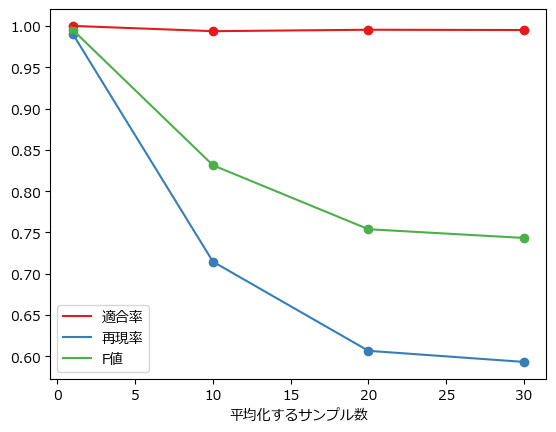

In [21]:
List_Linear_result = []
F_rate = []
target_per = [1]+list(range(10,40,10))

for per in target_per:
    
    m = LS_class_per(per,is_per=True)[0]

    tekigo = m[0][0]/(m[0][0]+m[0][1])
    saigen = m[0][0]/(m[0][0]+m[1][0])
    
    FR = 2*tekigo*saigen/(tekigo+saigen)

    List_Linear_result.append([tekigo,saigen])
    F_rate.append(FR)
    
#ROC曲線

plt.rcParams['font.family'] = 'Meiryo'

List_Linear_result = np.array(List_Linear_result)
fig,ax = plt.subplots()

ax.scatter(target_per,List_Linear_result.T[0])
ax.plot(target_per,List_Linear_result.T[0],label="適合率")
ax.scatter(target_per,List_Linear_result.T[1])
ax.plot(target_per,List_Linear_result.T[1],label="再現率")
ax.scatter(target_per,F_rate)
ax.plot(target_per,F_rate,label="F値")

ax.set_xlabel("平均化するサンプル数")
ax.legend()

In [22]:
per =1

m,predict,target,target_y = LS_class_per(per=per,save=True)
print(m)  

/home/kashiwazaki/.local/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/kashiwazaki/.local/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/kashiwazaki/.local/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/kashiwazaki/.local/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/kashiwazaki/.local/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/kashiwazaki/.local/lib/python3.7/site-packages/sklearn/svm/

[0.9915666094911378, 0.9915666094911378, 0.9915666094911378, 0.9915666094911378, 0.9915666094911378, 0.9915666094911378, 0.9915666094911378, 0.9915666094911378]
{'loss': 'hinge', 'C': 1}
[[31  3]
 [ 8 99]]


/home/kashiwazaki/.local/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Text(0, 0.5, 'power')

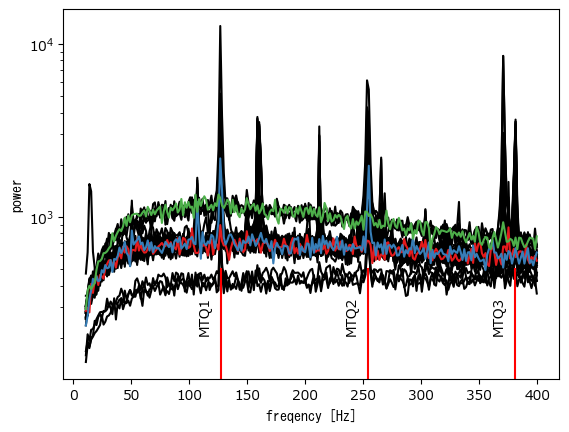

In [23]:
fig,ax = plt.subplots()

for d in target[(target_y==-1) & (predict==-1)]:
    ax.plot(x,d,color="black")

for d in target[(target_y==-1) & (predict==1)]:
    ax.plot(x,d)

ax.text(127-20,215,"MTQ1",rotation=90)
ax.text(254-20,215,"MTQ2",rotation=90)
ax.text(381-20,215,"MTQ3",rotation=90)

ax.plot([127,127],[0,500],color="red") #MTQ 82
ax.plot([254,254],[0,500],color="red") # MTQ3 166 
ax.plot([381,381],[0,500],color="red") # MTQ4 249

ax.set_yscale("log")

ax.set_xlabel("freqency [Hz]",fontname="MS Gothic")
ax.set_ylabel("power",fontname="MS Gothic")

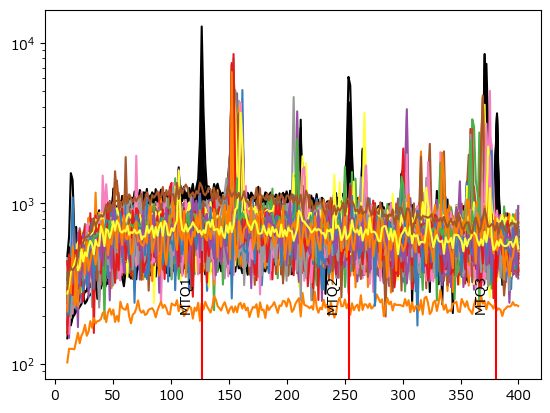

In [61]:
fig,ax = plt.subplots()

for d in target[ (predict==-1)]:
    ax.plot(x,d,color="black")

for d in target[ (predict==1)]:
    ax.plot(x,d)
    


    
ax.text(127-20,215,"MTQ1",rotation=90)
ax.text(254-20,215,"MTQ2",rotation=90)
ax.text(381-20,215,"MTQ3",rotation=90)

ax.plot([127,127],[0,500],color="red") #MTQ 82
ax.plot([254,254],[0,500],color="red") # MTQ3 166 
ax.plot([381,381],[0,500],color="red") # MTQ4 249

ax.set_yscale("log")

In [31]:
per = 10

from imblearn.over_sampling import SMOTE

#train test split
df_train,df_test = myds.train_test_dataframe(df_data=df_data7_pre,test_frac=0.01)

#教師 normal　加工①　ピーク1500以下 
df_train = df_train[(df_train.iloc[:,[82,165,249]]<1500).all(axis=1)]
df_train = df_train[(df_train.iloc[:,:9]<1500).all(axis=1)]
df_train,df_grid = myds.train_test_dataframe(df_data=df_train,test_frac=0.03)


######################################

#テスト noraml 加工
df_test_ = df_test[(df_test.loc[:,[82,165,249]]<950).all(axis=1)]

###################################3

#教師 normal 加工②　avarage 化

lim = len(df_train)//per*per

df_train = df_train.sample(frac=1)
df_train = df_train.to_numpy()[:lim].reshape([int(lim/per),per,len(df_train.to_numpy()[0])])
df_train = pd.DataFrame(myvs.avarange(df_train))
df_train.columns = df_data7_pre.columns
df_train_ = df_train

####################################
grid_MTQ_lim = 16


#教師作成
y_train_true = np.concatenate([
np.ones(len(df_train_)),
np.ones(len(df_data6_MTQNoise_pre_[:grid_MTQ_lim]))*-1])

#テスト正解作成
y_test_true = np.concatenate([
np.ones(len(df_test_)),
np.ones(len(df_data7_MTQNoise_pre))*-1])

#Grid正解作成
y_grid_true = np.concatenate([
np.ones(len(df_grid)),
np.ones(len(df_data6_MTQNoise_pre_[grid_MTQ_lim:]))*-1])

#学習データ
df_train = pd.concat([df_train,df_data6_MTQNoise_pre_[:grid_MTQ_lim]])
df_train.index = range(len(df_train))

#テストデータ
df_test = pd.concat([df_test_,df_data7_MTQNoise_pre])
df_test.index = range(len(df_test))

#Gridデータ
df_grid =  pd.concat([df_grid,df_data6_MTQNoise_pre_[grid_MTQ_lim:]])

############################################

#4分割

x_train = df_train.values.tolist()
y_train = y_train_true

x_grid = df_grid.values.tolist()
y_grid = y_grid_true

x_per,x_test,y_per,y_test = train_test_split(df_test.values.tolist(),y_test_true,random_state=0,test_size=0.5)


# SMOTE
smote = SMOTE(random_state=0)
x_train, y_train = smote.fit_resample(x_train, y_train)

###############################################
    
#正規化

sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)

sc = StandardScaler()
sc.fit(x_grid)
x_grid_std = sc.transform(x_grid)

sc = StandardScaler()
sc.fit(x_per)
x_per_std = sc.transform(x_per)

sc = StandardScaler()
sc.fit(x_test)
x_test_std = sc.transform(x_test)

#######################################3

#Grid Search

parameters = {
"penalty":["l1","l2"],
"alpha":[10**-7,10**-6,10**-5],
"loss":["squared_hinge","hinge"]
}

best_params_=my_Grid(parameters,[x_train_std,y_train],[x_grid_std,y_grid])
##################################

#学習


target = x_test
target_std = x_test_std
target_y = y_test

sgd = SGDClassifier(random_state=0,**best_params_)
sgd.fit(x_train_std,y_train)
df_sgd_predict = sgd.predict(target_std)

#結果
m = confusion_matrix(target_y,df_sgd_predict)
m

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


array([[11,  5],
       [17, 42]])

In [ ]:
parameters = {
    "loss":["hinge","squared_hinge"],
    "C":[1,0.1,0.01,0.001]
    }

In [23]:
def SGD_class_per(per,is_per = False,save=False):
    
    #train test split
    df_train,df_test = myds.train_test_dataframe(df_data=df_data7_pre,test_frac=0.3)
    print(f"firststep train:{len(df_train)} test:{len(df_test)}")
    
    ######################################
    
    #テスト noraml 加工
    df_test_ = df_test[(df_test.loc[:,[82,165,249]]<960).all(axis=1)]
    df_test_ = df_test_[df_test_.diff(6,axis=1).loc[:,[82,165,249]].max(axis=1)<100]
    
    ###################################3
    
    #教師 normal　加工①　ピーク1500以下 
    df_train = df_train[(df_train.loc[:,[82,165,249]]<1500).all(axis=1)]
    
    print(f"secondtstep train:{len(df_train)} test:{len(df_test_)}")
    
    # 2分割
    df_train,df_grid =  myds.train_test_dataframe(df_train,test_frac=0.5)
    df_MTQ_train,df_MTQ_grid = myds.train_test_dataframe(df_data6_MTQNoise_pre)
   
    
    #平均化

    lim = len(df_train)//per*per

    df_train = df_train.sample(frac=1)
    df_train = df_train.to_numpy()[:lim].reshape([int(lim/per),per,len(df_train.to_numpy()[0])])
    df_train = pd.DataFrame(myvs.avarange(df_train))
    df_train.columns = df_data7_pre.columns
    df_train_ = df_train
    

    ####################################

    #MTQ 教師作成
    y_train = np.concatenate([
    np.ones(len(df_train_)),
    np.ones(len(df_MTQ_train))*-1])
    
    #MTQ Grid作成
    y_grid = np.concatenate([
    np.ones(len(df_grid)),
    np.ones(len(df_MTQ_grid))*-1])

    #MTQ test正解作成
    y_test_MTQtrue = np.concatenate([
    np.ones(len(df_test_)),
    np.ones(len(df_data7_MTQNoise_pre))*-1])

    # MTQ 学習データ
    x_train = pd.concat([df_train_,df_MTQ_train]).values.tolist()
    
    #Grid 学習データ
    x_grid = pd.concat([df_grid,df_MTQ_grid]).values.tolist()
    

    #MTQ テストデータ
    df_test_MTQ = pd.concat([df_test_,df_data7_MTQNoise_pre])
    df_test_MTQ.index = range(len(df_test_MTQ))
    
    ############################################
    
    #2分割
    
   
    x_per,x_test,y_per,y_test = train_test_split(df_test.values.tolist(),y_test_true,random_state=0,test_size=0.5)
    
    ###############################################
    
    #正規化

    sc = StandardScaler()
    sc.fit(x_train)
    x_train_std = sc.transform(x_train)

    sc = StandardScaler()
    sc.fit(x_grid)
    x_grid_std = sc.transform(x_grid)

    sc = StandardScaler()
    sc.fit(x_per)
    x_per_std = sc.transform(x_per)

    sc = StandardScaler()
    sc.fit(x_test)
    x_test_std = sc.transform(x_test)
    
    #######################################3
    
    #Grid Search
    
    parameters = {
    "penalty":["l1","l2"],
    "alpha":[10**-7,10**-6,10**-5,10**-4,10**-3],
    "loss":["squared_hinge","hinge"]
    }
    

    sgd = SGDClassifier(random_state=0)
    S_grid = GridSearchCV(sgd,parameters,cv=3)
    S_grid.fit(x_grid_std,y_grid)
    
    ##################################

    #学習
    
    if is_per:
        target_std = x_per_std
        target_y = y_per
    else:
        target_std = x_test_std
        target_y = y_test
    
    sgd = SGDClassifier(random_state=0,alpha=S_grid.best_params_["alpha"], loss= S_grid.best_params_["loss"], penalty=S_grid.best_params_["penalty"])
    sgd.fit(x_train_std,y_train)
    df_sgd_predict = pd.DataFrame(sgd.predict(target_std))
    
    if save:
        with open(f'20212221_ver1_sgd.pickle', mode='wb') as f:
            pickle.dump(sgd,f,protocol=2)
    
    #結果

    m = confusion_matrix(target_y,df_sgd_predict)
    
    return [m,S_grid.best_params_,target_y,df_sgd_predict,np.array(x_test)]

In [ ]:
def SGD_class_per(per,is_per = False,save=False):
    
    #train test split
    df_train,df_test = myds.train_test_dataframe(df_data=df_data7_pre,test_frac=0.01)
    
    #教師 normal　加工①　ピーク1500以下 
    df_train = df_train[(df_train.iloc[:,[82,165,249]]<1500).all(axis=1)]
    df_train,df_grid = myds.train_test_dataframe(df_data=df_train,test_frac=0.03)
    
    
    ######################################
    
    #テスト noraml 加工
    df_test_ = df_test[(df_test.loc[:,[82,165,249]]<950).all(axis=1)]
    
    ###################################3

    #教師 normal 加工②　avarage 化

    lim = len(df_train)//per*per

    df_train = df_train.sample(frac=1)
    df_train = df_train.to_numpy()[:lim].reshape([int(lim/per),per,len(df_train.to_numpy()[0])])
    df_train = pd.DataFrame(myvs.avarange(df_train))
    df_train.columns = df_data7_pre.columns
    df_train_ = df_train
    
    ####################################
    grid_MTQ_lim = 10
    
    
    #教師作成
    y_train_true = np.concatenate([
    np.ones(len(df_train_)),
    np.ones(len(df_data6_MTQNoise_pre_[:grid_MTQ_lim]))*-1])

    #テスト正解作成
    y_test_true = np.concatenate([
    np.ones(len(df_test_)),
    np.ones(len(df_data7_MTQNoise_pre))*-1])
    
    #Grid正解作成
    y_grid_true = np.concatenate([
    np.ones(len(df_grid)),
    np.ones(len(df_data6_MTQNoise_pre_[grid_MTQ_lim:]))*-1])

    #学習データ
    print("c")
    print(len(df_train))
    df_train = pd.concat([df_train,df_data6_MTQNoise_pre_[:grid_MTQ_lim]])
    df_train.index = range(len(df_train))

    #テストデータ
    df_test = pd.concat([df_test_,df_data7_MTQNoise_pre])
    df_test.index = range(len(df_test))
    
    #Gridデータ
    df_grid =  pd.concat([df_grid,df_data6_MTQNoise_pre_[grid_MTQ_lim:]])
    
    ############################################
    
    #4分割
   
    x_train = df_train.values.tolist()
    y_train = y_train_true
    
    x_grid = df_grid.values.tolist()
    y_grid = y_grid_true
    
    x_test,x_per,y_test,y_per = train_test_split(df_test.values.tolist(),y_test_true,random_state=0,test_size=0.2)
    
    # SMOTE
    print("b")
    print(len(x_train))
    smote = SMOTE(random_state=0)
    x_train, y_train = smote.fit_resample(x_train, y_train)
    print(len(np.array(y_train)[np.array(y_train)==1]))
    
    smote = SMOTE(random_state=0)
    x_per, y_per = smote.fit_resample(x_per, y_per)
    ###############################################
    
    #正規化

    sc = StandardScaler()
    sc.fit(x_train)
    x_train_std = sc.transform(x_train)

    sc = StandardScaler()
    sc.fit(x_grid)
    x_grid_std = sc.transform(x_grid)

    sc = StandardScaler()
    sc.fit(x_per)
    x_per_std = sc.transform(x_per)

    sc = StandardScaler()
    sc.fit(x_test)
    x_test_std = sc.transform(x_test)
    
    #######################################3
    
    #Grid Search
    
    parameters = {
    "penalty":["l1","l2"],
    "alpha":[10**-7,10**-6,10**-5],
    "loss":["squared_hinge","hinge"]
    }
    print(len(x_train_std))
    
    best_params_=my_Grid(parameters,[x_train_std,y_train],[x_grid_std,y_grid])
    print(best_params_)
    ##################################

    #学習
    
    if is_per:
        target = x_per
        target_std = x_per_std
        target_y = y_per
    else:
        target = x_test
        target_std = x_test_std
        target_y = y_test
        
    #sgd = SGDClassifier(random_state=0)
    sgd = SGDClassifier(random_state=0,**best_params_)
    sgd.fit(x_train_std,y_train)
    df_sgd_predict = sgd.predict(target_std)
    #結果
    m = confusion_matrix(target_y,df_sgd_predict)
    
    
    return [m,df_sgd_predict,np.array(target),np.array(target_y)]

In [ ]:
#train test split
    df_train,df_test = myds.train_test_dataframe(df_data=df_data7_pre,test_frac=0.01)
    
    #教師 normal　加工①　ピーク1500以下 
    df_train = df_train[(df_train.iloc[:,[82,165,249]]<1500).all(axis=1)]
    df_train,df_grid = myds.train_test_dataframe(df_data=df_train,test_frac=0.03)
    
    
    ######################################
    
    #テスト noraml 加工
    df_test_ = df_test[(df_test.loc[:,[82,165,249]]<950).all(axis=1)]
    
    ###################################3

    #教師 normal 加工②　avarage 化

    lim = len(df_train)//per*per

    df_train = df_train.sample(frac=1)
    df_train = df_train.to_numpy()[:lim].reshape([int(lim/per),per,len(df_train.to_numpy()[0])])
    df_train = pd.DataFrame(myvs.avarange(df_train))
    df_train.columns = df_data7_pre.columns
    df_train_ = df_train
    
    ####################################
    grid_MTQ_lim = 16
    
    
    #教師作成
    y_train_true = np.concatenate([
    np.ones(len(df_train_)),
    np.ones(len(df_data6_MTQNoise_pre_[:grid_MTQ_lim]))*-1])

    #テスト正解作成
    y_test_true = np.concatenate([
    np.ones(len(df_test_)),
    np.ones(len(df_data7_MTQNoise_pre))*-1])
    
    #Grid正解作成
    y_grid_true = np.concatenate([
    np.ones(len(df_grid)),
    np.ones(len(df_data6_MTQNoise_pre_[grid_MTQ_lim:]))*-1])

    #学習データ
    df_train = pd.concat([df_train,df_data6_MTQNoise_pre_[:grid_MTQ_lim]])
    df_train.index = range(len(df_train))

    #テストデータ
    df_test = pd.concat([df_test_,df_data7_MTQNoise_pre])
    df_test.index = range(len(df_test))
    
    #Gridデータ
    df_grid =  pd.concat([df_grid,df_data6_MTQNoise_pre_[grid_MTQ_lim:]])
    
    ############################################
    
    #4分割
   
    x_train = df_train.values.tolist()
    y_train = y_train_true
    
    x_grid = df_grid.values.tolist()
    y_grid = y_grid_true
    
    x_test,x_per,y_test,y_per = train_test_split(df_test.values.tolist(),y_test_true,random_state=0,test_size=0.5)
    
    # SMOTE
    smote = SMOTE(random_state=0)
    x_train, y_train = smote.fit_resample(x_train, y_train)
    
    ###############################################
    
    #正規化

    sc = StandardScaler()
    sc.fit(x_train)
    x_train_std = sc.transform(x_train)

    sc = StandardScaler()
    sc.fit(x_grid)
    x_grid_std = sc.transform(x_grid)

    sc = StandardScaler()
    sc.fit(x_per)
    x_per_std = sc.transform(x_per)

    sc = StandardScaler()
    sc.fit(x_test)
    x_test_std = sc.transform(x_test)
    
    #######################################3
    
    #Grid Search
    
    parameters = {
    "loss":["hinge","squared_hinge"],
    "C":[1,0.1,0.01,0.001]
    }
    
    best_params_=my_LVGrid(parameters,[x_train_std,y_train],[x_grid_std,y_grid])
    print(best_params_)
    ##################################

    #学習
    
    if is_per:
        target = x_per
        target_std = x_per_std
        target_y = y_per
    else:
        target = x_test
        target_std = x_test_std
        target_y = y_test
        
    ls = LinearSVC(random_state=0,**best_params_)
    ls.fit(x_train_std,y_train)
    df_ls_predict = ls.predict(target_std)
    #結果
    m = confusion_matrix(target_y,df_ls_predict)
    
    
    return [m,df_ls_predict,np.array(target),np.array(target_y)]